<a href="https://colab.research.google.com/github/irinap9270/hg_ml/blob/main/Ch9-2.%20BasicRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 전처리

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

# 검증 세트 생성
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

# 데이터 길이 평균, 중간값 출력
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

# 데이터 길이 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

239.00925 178.0


# RNN 모델 생성

In [2]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 원-핫 인코딩

Epoch 1/5
313/313 [==============================] - 27s 79ms/step - loss: 0.6994 - accuracy: 0.5013 - val_loss: 0.6969 - val_accuracy: 0.5086
Epoch 2/5
  3/313 [..............................] - ETA: 17s - loss: 0.6844 - accuracy: 0.5781

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 22s 70ms/step - loss: 0.6957 - accuracy: 0.5066 - val_loss: 0.6947 - val_accuracy: 0.5160
Epoch 3/5
313/313 [==============================] - 21s 68ms/step - loss: 0.6935 - accuracy: 0.5141 - val_loss: 0.6933 - val_accuracy: 0.5202
Epoch 4/5
313/313 [==============================] - 22s 70ms/step - loss: 0.6920 - accuracy: 0.5190 - val_loss: 0.6924 - val_accuracy: 0.5202
Epoch 5/5
313/313 [==============================] - 21s 66ms/step - loss: 0.6907 - accuracy: 0.5258 - val_loss: 0.6916 - val_accuracy: 0.5254


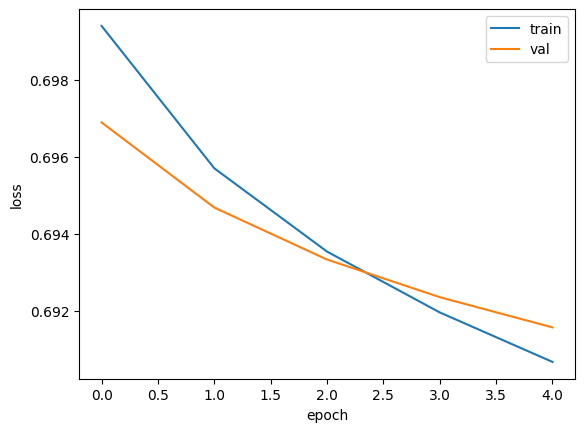

In [3]:
# 토큰을 원-핫 인코딩 변형
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

# 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=5, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 훈련 손실, 검증 손실 그래프 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 단어 임베딩

Epoch 1/5
313/313 [==============================] - 36s 109ms/step - loss: 0.6841 - accuracy: 0.5565 - val_loss: 0.6651 - val_accuracy: 0.6158
Epoch 2/5
  2/313 [..............................] - ETA: 23s - loss: 0.6636 - accuracy: 0.6250

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 31s 101ms/step - loss: 0.6521 - accuracy: 0.6406 - val_loss: 0.6399 - val_accuracy: 0.6612
Epoch 3/5
313/313 [==============================] - 31s 98ms/step - loss: 0.6288 - accuracy: 0.6779 - val_loss: 0.6220 - val_accuracy: 0.6798
Epoch 4/5
313/313 [==============================] - 29s 94ms/step - loss: 0.6098 - accuracy: 0.7012 - val_loss: 0.6089 - val_accuracy: 0.7002
Epoch 5/5
313/313 [==============================] - 29s 93ms/step - loss: 0.5944 - accuracy: 0.7168 - val_loss: 0.5915 - val_accuracy: 0.7198


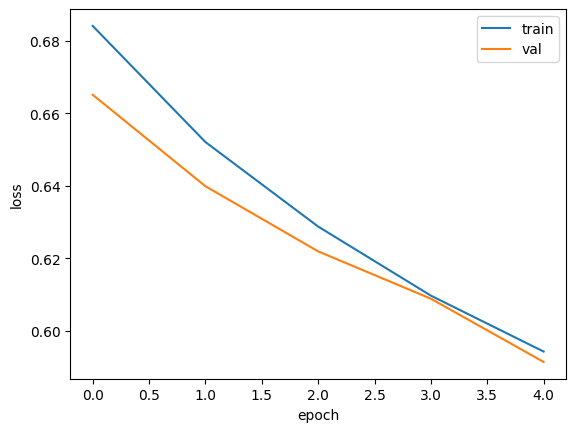

In [4]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=5, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()